In [1]:
### importing necessary libraries ###

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
import math
import time
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR


test_split = 0.5

#days[-65:] for test split 0.1
#days[-193:] for test split 0.3
#days[-321:] for test split 0.5

## Predicting Total Confirmed Cases

In [2]:
### Loading the dataset ###

data_whole = pd.read_csv('case_time_series.csv')
data_whole.isnull().sum() # Checking null values
print(data_whole)

data = data_whole.loc[:, data_whole.keys()[1]:data_whole.keys()[-1]]


days = []
for i in range(641):
    days.append(i+1)


tot_confirmed = data['Total Confirmed']
daily_confirmed = data['Daily Confirmed']
tot_recovered = data['Total Recovered']
daily_recovered = data['Daily Recovered']
tot_deceased = data['Total Deceased']
daily_deceased = data['Daily Deceased']

X = data.drop('Daily Confirmed',axis=1).drop('Total Confirmed',axis=1).drop('Date_YMD',axis=1)
days = np.array(days).reshape(-1,1)
                      


                Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0    30 January 2020  2020-01-30                1                1   
1    31 January 2020  2020-01-31                0                1   
2    1 February 2020  2020-02-01                0                1   
3    2 February 2020  2020-02-02                1                2   
4    3 February 2020  2020-02-03                1                3   
..               ...         ...              ...              ...   
636  27 October 2021  2021-10-27            16351         34231030   
637  28 October 2021  2021-10-28            14307         34245337   
638  29 October 2021  2021-10-29            14215         34259552   
639  30 October 2021  2021-10-30            12940         34272492   
640  31 October 2021  2021-10-31            12907         34285399   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                  0                0               0               0  
1              

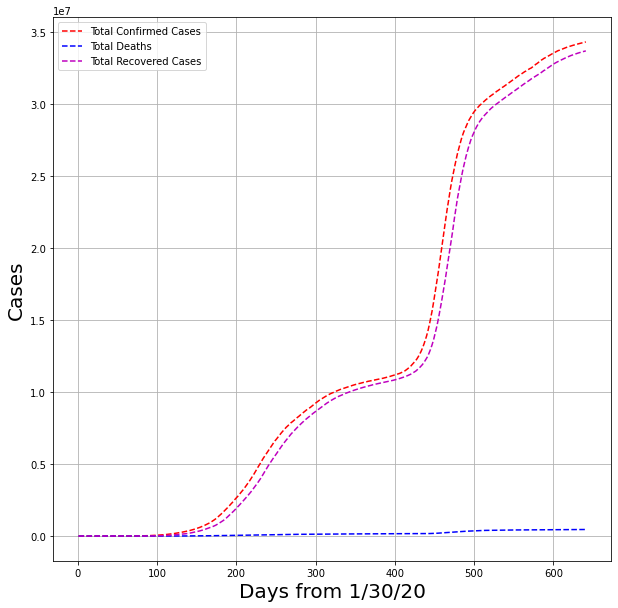

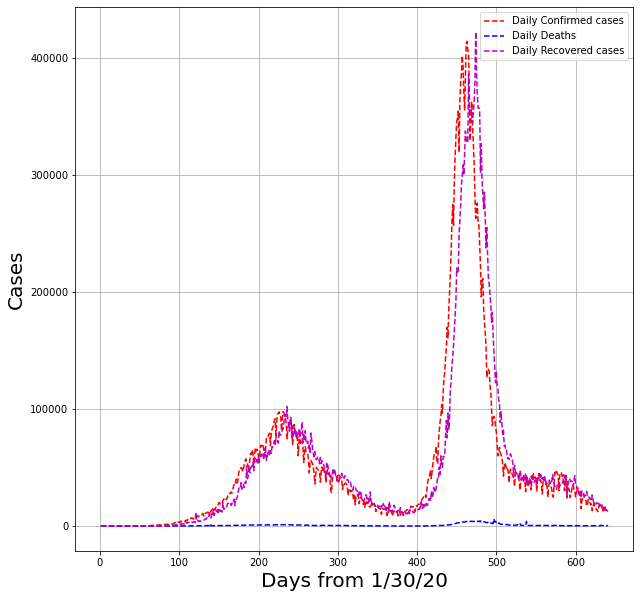

In [3]:
### Visualising the dataset ###


plt.figure(figsize=(10,10))
plt.plot(days,tot_confirmed,'--r',label = 'Total Confirmed Cases')
plt.plot(days,tot_deceased,'--b',label = 'Total Deaths')
plt.plot(days,tot_recovered,'--m',label = 'Total Recovered Cases')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Cases',size=20)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,10))
plt.plot(days,daily_confirmed,'--r',label = 'Daily Confirmed cases')
plt.plot(days,daily_deceased,'--b',label = 'Daily Deaths')
plt.plot(days,daily_recovered,'--m',label = 'Daily Recovered cases')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Cases',size=20)
plt.legend()
plt.grid()
plt.show()


In [4]:
### dividing into training and testing data ###

days = np.array(days).reshape(-1,1)
tot_confirmed = np.array(tot_confirmed).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, tot_confirmed, test_size=test_split, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.97334783 -0.77009758 -1.13668526 -0.90448508]
 [-0.97334783 -0.77009758 -1.13668526 -0.90448508]
 [-0.97334783 -0.77009758 -1.13668526 -0.90448508]
 ...
 [ 0.12046446  2.16212435 -0.14320919  1.91458261]
 [ 0.03956989  2.17172636 -0.27787475  1.92127093]
 [ 0.16456473  2.18251327 -0.237221    1.92827586]]


Model accuracy: 0.9985655603059719


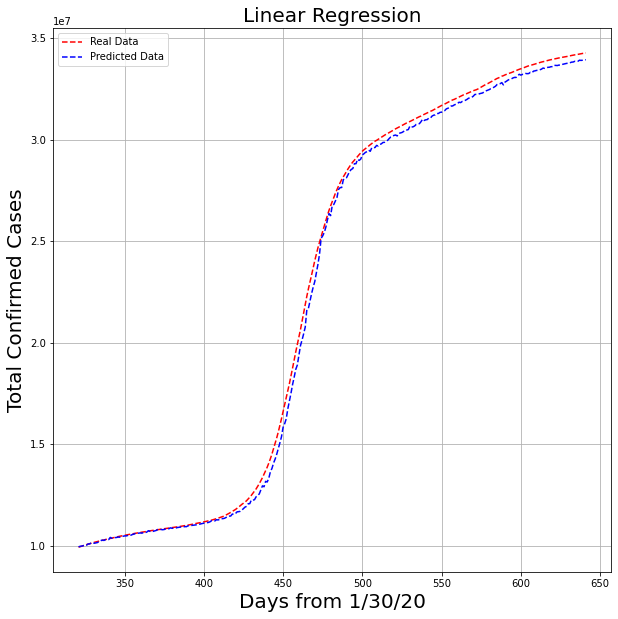

In [5]:
### Linear Regression Model ###

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Model accuracy:', accuracy)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Total Confirmed Cases',size=20)
plt.title('Linear Regression',size=20)
plt.legend()
plt.grid()
plt.show()

R2 score: 0.9849550165689295


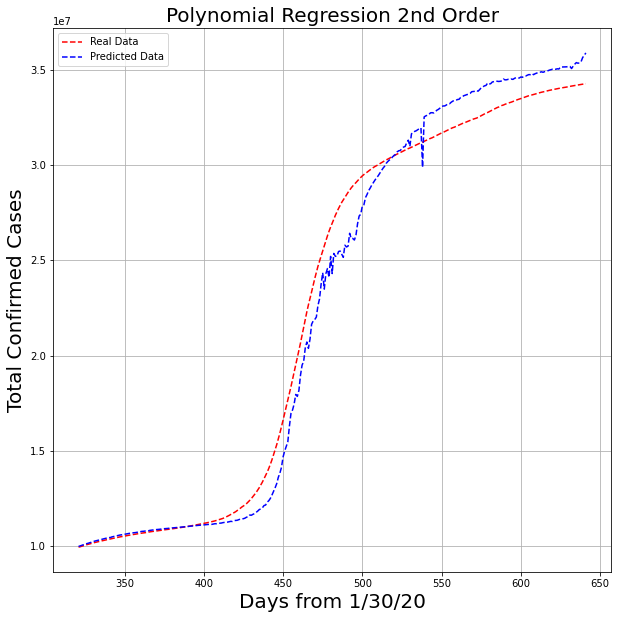

In [6]:
### Polynomial Regression Model 2nd Degree ###

poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly2, y_train)

y_pred = model.predict(X_test_poly2)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Total Confirmed Cases',size=20)
plt.title('Polynomial Regression 2nd Order',size=20)
plt.legend()
plt.grid()
plt.show()

In [7]:
# ### Polynomial Regression Model 3rd Degree ###

# poly3 = PolynomialFeatures(degree=3)

# X_train_poly3 = poly3.fit_transform(X_train)
# X_test_poly3 = poly3.transform(X_test)

# model = LinearRegression()
# model.fit(X_train_poly3, y_train)

# y_pred = model.predict(X_test_poly3)

# # accuracy = model.score(X_test_poly3, y_test)
# # print('Model accuracy:', accuracy)

# r2 = sklearn.metrics.r2_score(y_test, y_pred)
# print('R2 score:', r2)

# plt.figure(figsize=(10,10))
# plt.plot(days[-193:],y_test,'--r',label = 'Real Data')
# plt.plot(days[-193:],y_pred,'--b',label = 'Predicted Data')
# plt.xlabel('Days from 1/30/20',size=20)
# plt.ylabel('Cases',size=20)
# plt.title('Polynomial Regression 3rd Order',size=20)
# plt.legend()
# plt.grid()
# plt.show()

In [8]:
# ### Support Vector Machine (SVM) ###

# model = SVR(kernel='rbf')
# model.fit(X_train, np.ravel(y_train))

# y_pred = model.predict(X_test)
# accuracy = model.score(X_test, y_test)
# print('Model accuracy:', accuracy)

# r2 = sklearn.metrics.r2_score(y_test, y_pred)
# print('R2 score:', r2)

# plt.figure(figsize=(10,10))
# plt.plot(days[-193:], y_test, '--r', label='Real Data')
# plt.plot(days[-193:], y_pred, '--b', label='Predicted Data')
# plt.xlabel('Days from 1/30/20', size=20)
# plt.ylabel('Cases', size=20)
# plt.title('SVM', size=20)
# plt.legend()
# plt.grid()
# plt.show()

In [9]:
# ### Decision Tree Regressor ###

# from sklearn.tree import DecisionTreeRegressor
# import matplotlib.pyplot as plt

# # create and fit the model
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

# # generate predictions and calculate accuracy
# y_pred = model.predict(X_test)
# accuracy = model.score(X_test, y_test)
# print('Model accuracy:', accuracy)

# # plot the results
# plt.figure(figsize=(10,10))
# plt.plot(days[-193:], y_test, '--r', label='Real Data')
# plt.plot(days[-193:], y_pred, '--b', label='Predicted Data')
# plt.xlabel('Days from 1/22/20', size=20)
# plt.ylabel('Cases', size=20)
# plt.title('Decision Tree Regression', size=20)
# plt.legend()
# plt.grid()
# plt.show()


## Predicting Daily Confirmed Cases

In [10]:
### Loading the dataset ###

data_whole = pd.read_csv('case_time_series.csv')
data_whole.isnull().sum() # Checking null values
print(data_whole)

data = data_whole.loc[:, data_whole.keys()[1]:data_whole.keys()[-1]]


days = []
for i in range(641):
    days.append(i+1)


tot_confirmed = data['Total Confirmed']
daily_confirmed = data['Daily Confirmed']
tot_recovered = data['Total Recovered']
daily_recovered = data['Daily Recovered']
tot_deceased = data['Total Deceased']
daily_deceased = data['Daily Deceased']

X = data.drop('Daily Confirmed',axis=1).drop('Total Confirmed',axis=1).drop('Date_YMD',axis=1)
days = np.array(days).reshape(-1,1)

                Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0    30 January 2020  2020-01-30                1                1   
1    31 January 2020  2020-01-31                0                1   
2    1 February 2020  2020-02-01                0                1   
3    2 February 2020  2020-02-02                1                2   
4    3 February 2020  2020-02-03                1                3   
..               ...         ...              ...              ...   
636  27 October 2021  2021-10-27            16351         34231030   
637  28 October 2021  2021-10-28            14307         34245337   
638  29 October 2021  2021-10-29            14215         34259552   
639  30 October 2021  2021-10-30            12940         34272492   
640  31 October 2021  2021-10-31            12907         34285399   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                  0                0               0               0  
1              

In [11]:
### dividing into training and testing data ###

days = np.array(days).reshape(-1,1)
daily_confirmed = np.array(daily_confirmed).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, daily_confirmed, test_size=test_split, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model accuracy: 0.582067673445742


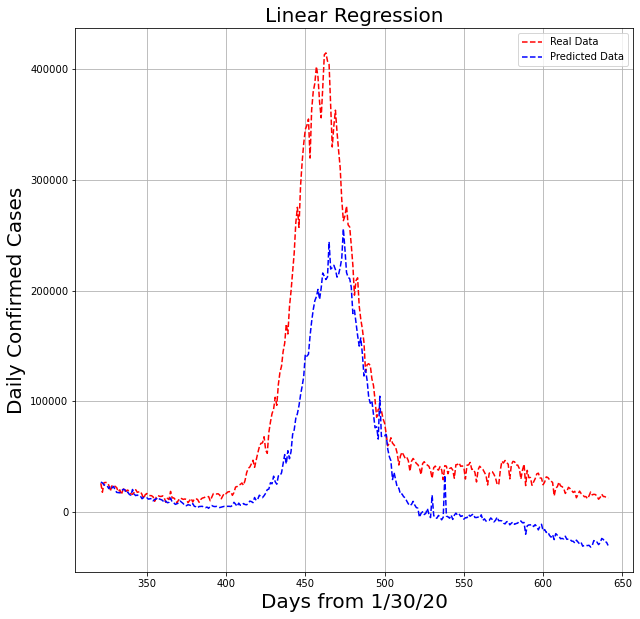

In [12]:
### Linear Regression Model ###

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('Model accuracy:', accuracy)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Daily Confirmed Cases',size=20)
plt.title('Linear Regression',size=20)
plt.legend()
plt.grid()
plt.show()

R2 score: -30.16167202597883


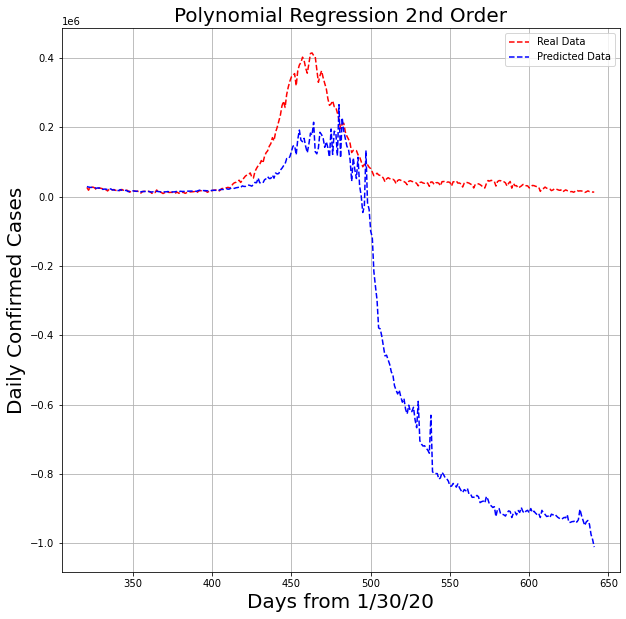

In [13]:
### Polynomial Regression Model 2nd Degree ###

poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly2, y_train)

y_pred = model.predict(X_test_poly2)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Daily Confirmed Cases',size=20)
plt.title('Polynomial Regression 2nd Order',size=20)
plt.legend()
plt.grid()
plt.show()

In [14]:
# ### Polynomial Regression Model 3rd Degree ###

# poly3 = PolynomialFeatures(degree=3)

# X_train_poly3 = poly3.fit_transform(X_train)
# X_test_poly3 = poly3.transform(X_test)

# model = LinearRegression()
# model.fit(X_train_poly3, y_train)

# y_pred = model.predict(X_test_poly3)

# # accuracy = model.score(X_test_poly3, y_test)
# # print('Model accuracy:', accuracy)

# r2 = sklearn.metrics.r2_score(y_test, y_pred)
# print('R2 score:', r2)

# plt.figure(figsize=(10,10))
# plt.plot(days[-193:],y_test,'--r',label = 'Real Data')
# plt.plot(days[-193:],y_pred,'--b',label = 'Predicted Data')
# plt.xlabel('Days from 1/30/20',size=20)
# plt.ylabel('Cases',size=20)
# plt.title('Polynomial Regression 3rd Order',size=20)
# plt.legend()
# plt.grid()
# plt.show()

In [15]:
# ### Support Vector Machine (SVM) ###

# model = SVR(kernel='rbf')
# model.fit(X_train, np.ravel(y_train))

# y_pred = model.predict(X_test)
# accuracy = model.score(X_test, y_test)
# print('Model accuracy:', accuracy)

# r2 = sklearn.metrics.r2_score(y_test, y_pred)
# print('R2 score:', r2)

# plt.figure(figsize=(10,10))
# plt.plot(days[-193:], y_test, '--r', label='Real Data')
# plt.plot(days[-193:], y_pred, '--b', label='Predicted Data')
# plt.xlabel('Days from 1/30/20', size=20)
# plt.ylabel('Cases', size=20)
# plt.title('SVM', size=20)
# plt.legend()
# plt.grid()
# plt.show()

In [16]:
# ### Decision Tree Regressor ###

# from sklearn.tree import DecisionTreeRegressor
# import matplotlib.pyplot as plt

# # create and fit the model
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

# # generate predictions and calculate accuracy
# y_pred = model.predict(X_test)
# accuracy = model.score(X_test, y_test)
# print('Model accuracy:', accuracy)

# # plot the results
# plt.figure(figsize=(10,10))
# plt.plot(days[-193:], y_test, '--r', label='Real Data')
# plt.plot(days[-193:], y_pred, '--b', label='Predicted Data')
# plt.xlabel('Days from 1/22/20', size=20)
# plt.ylabel('Cases', size=20)
# plt.title('Decision Tree Regression', size=20)
# plt.legend()
# plt.grid()
# plt.show()

## Predicting Total Recovered Cases

In [17]:
### Loading the dataset ###

data_whole = pd.read_csv('case_time_series.csv')
data_whole.isnull().sum() # Checking null values
print(data_whole)

data = data_whole.loc[:, data_whole.keys()[1]:data_whole.keys()[-1]]


days = []
for i in range(641):
    days.append(i+1)


tot_confirmed = data['Total Confirmed']
daily_confirmed = data['Daily Confirmed']
tot_recovered = data['Total Recovered']
daily_recovered = data['Daily Recovered']
tot_deceased = data['Total Deceased']
daily_deceased = data['Daily Deceased']

X = data.drop('Daily Recovered',axis=1).drop('Total Recovered',axis=1).drop('Date_YMD',axis=1)
days = np.array(days).reshape(-1,1)

                Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0    30 January 2020  2020-01-30                1                1   
1    31 January 2020  2020-01-31                0                1   
2    1 February 2020  2020-02-01                0                1   
3    2 February 2020  2020-02-02                1                2   
4    3 February 2020  2020-02-03                1                3   
..               ...         ...              ...              ...   
636  27 October 2021  2021-10-27            16351         34231030   
637  28 October 2021  2021-10-28            14307         34245337   
638  29 October 2021  2021-10-29            14215         34259552   
639  30 October 2021  2021-10-30            12940         34272492   
640  31 October 2021  2021-10-31            12907         34285399   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                  0                0               0               0  
1              

In [18]:
### dividing into training and testing data ###

days = np.array(days).reshape(-1,1)
tot_recovered = np.array(tot_recovered).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, tot_recovered, test_size=test_split, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

R2 score: 0.9986855880672038


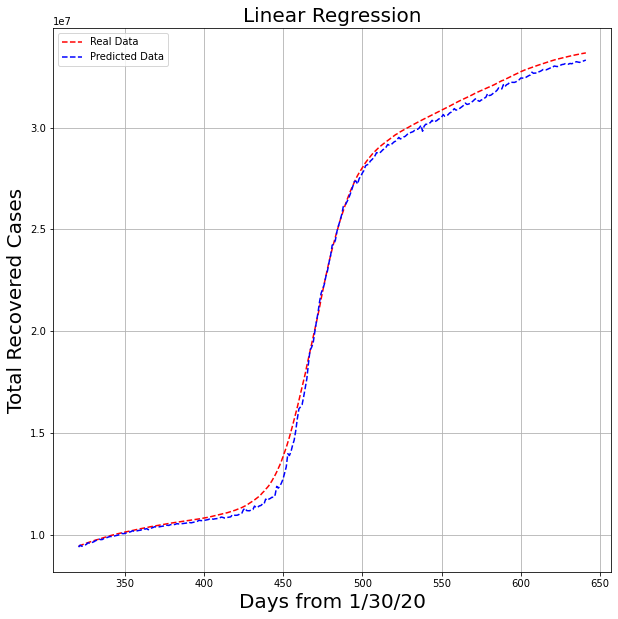

In [19]:
### Linear Regression Model ###

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Total Recovered Cases',size=20)
plt.title('Linear Regression',size=20)
plt.legend()
plt.grid()
plt.show()

R2 score: -0.21182728365106862


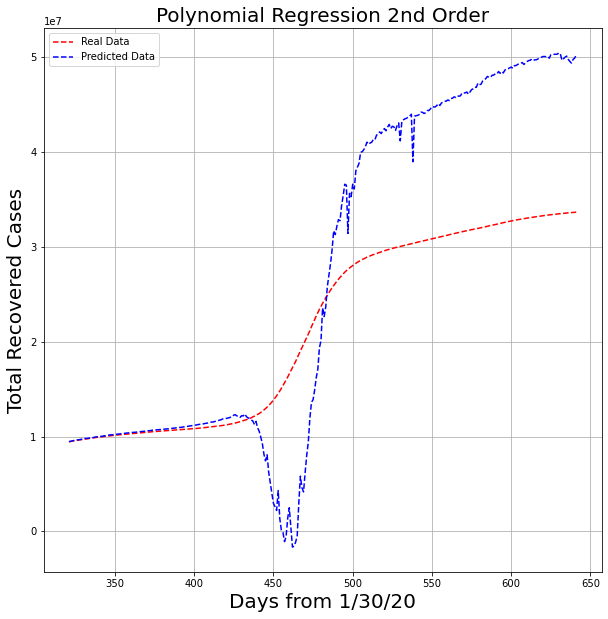

In [20]:
### Polynomial Regression Model 2nd Degree ###

poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly2, y_train)

y_pred = model.predict(X_test_poly2)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Total Recovered Cases',size=20)
plt.title('Polynomial Regression 2nd Order',size=20)
plt.legend()
plt.grid()
plt.show()

## Predicting Daily Recovered Cases

In [21]:
### Loading the dataset ###

data_whole = pd.read_csv('case_time_series.csv')
data_whole.isnull().sum() # Checking null values
print(data_whole)

data = data_whole.loc[:, data_whole.keys()[1]:data_whole.keys()[-1]]


days = []
for i in range(641):
    days.append(i+1)


tot_confirmed = data['Total Confirmed']
daily_confirmed = data['Daily Confirmed']
tot_recovered = data['Total Recovered']
daily_recovered = data['Daily Recovered']
tot_deceased = data['Total Deceased']
daily_deceased = data['Daily Deceased']

X = data.drop('Daily Recovered',axis=1).drop('Total Recovered',axis=1).drop('Date_YMD',axis=1)

                Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0    30 January 2020  2020-01-30                1                1   
1    31 January 2020  2020-01-31                0                1   
2    1 February 2020  2020-02-01                0                1   
3    2 February 2020  2020-02-02                1                2   
4    3 February 2020  2020-02-03                1                3   
..               ...         ...              ...              ...   
636  27 October 2021  2021-10-27            16351         34231030   
637  28 October 2021  2021-10-28            14307         34245337   
638  29 October 2021  2021-10-29            14215         34259552   
639  30 October 2021  2021-10-30            12940         34272492   
640  31 October 2021  2021-10-31            12907         34285399   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                  0                0               0               0  
1              

In [22]:
### dividing into training and testing data ###

days = np.array(days).reshape(-1,1)
daily_recovered = np.array(daily_recovered).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, daily_recovered, test_size=test_split, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

R2 score: 0.5827242584621524


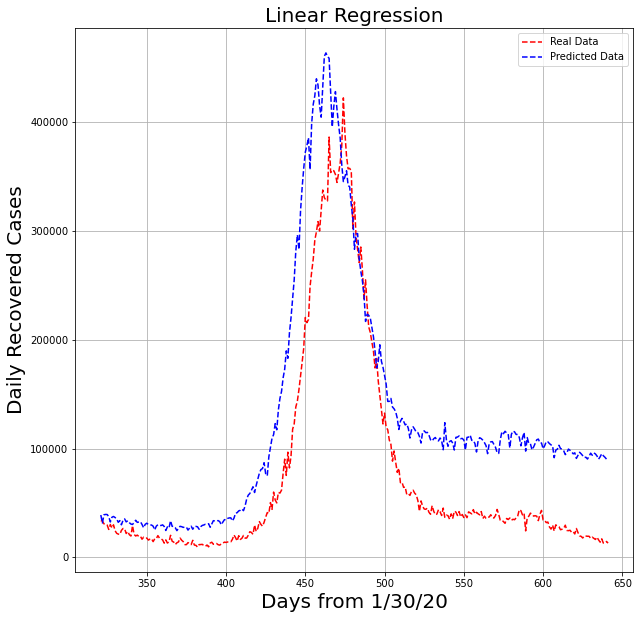

In [23]:
### Linear Regression Model ###

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Daily Recovered Cases',size=20)
plt.title('Linear Regression',size=20)
plt.legend()
plt.grid()
plt.show()

R2 score: -99.0301234579275


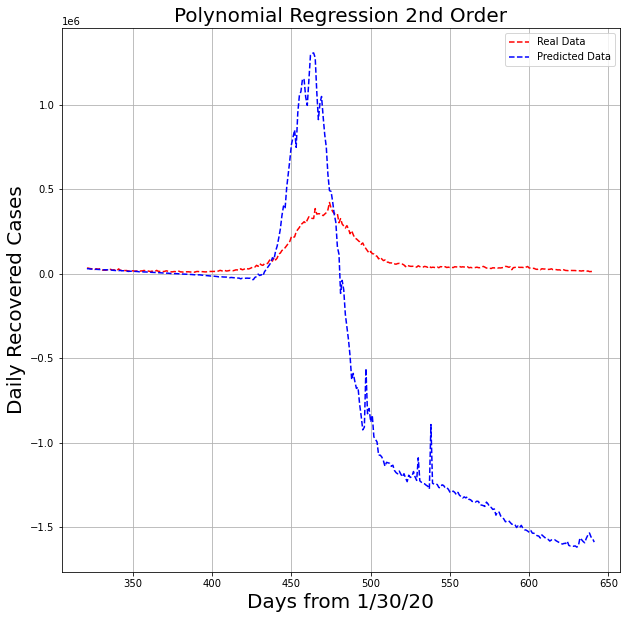

In [24]:
### Polynomial Regression Model 2nd Degree ###

poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly2, y_train)

y_pred = model.predict(X_test_poly2)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Daily Recovered Cases',size=20)
plt.title('Polynomial Regression 2nd Order',size=20)
plt.legend()
plt.grid()
plt.show()

## Predicitng Total Deceased Cases

In [25]:
### Loading the dataset ###

data_whole = pd.read_csv('case_time_series.csv')
data_whole.isnull().sum() # Checking null values
print(data_whole)

data = data_whole.loc[:, data_whole.keys()[1]:data_whole.keys()[-1]]


days = []
for i in range(641):
    days.append(i+1)


tot_confirmed = data['Total Confirmed']
daily_confirmed = data['Daily Confirmed']
tot_recovered = data['Total Recovered']
daily_recovered = data['Daily Recovered']
tot_deceased = data['Total Deceased']
daily_deceased = data['Daily Deceased']

X = data.drop('Daily Deceased',axis=1).drop('Total Deceased',axis=1).drop('Date_YMD',axis=1)

                Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0    30 January 2020  2020-01-30                1                1   
1    31 January 2020  2020-01-31                0                1   
2    1 February 2020  2020-02-01                0                1   
3    2 February 2020  2020-02-02                1                2   
4    3 February 2020  2020-02-03                1                3   
..               ...         ...              ...              ...   
636  27 October 2021  2021-10-27            16351         34231030   
637  28 October 2021  2021-10-28            14307         34245337   
638  29 October 2021  2021-10-29            14215         34259552   
639  30 October 2021  2021-10-30            12940         34272492   
640  31 October 2021  2021-10-31            12907         34285399   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                  0                0               0               0  
1              

In [26]:
### dividing into training and testing data ###

days = np.array(days).reshape(-1,1)
tot_deceased = np.array(tot_deceased).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, tot_deceased, test_size=test_split, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

R2 score: 0.8967863603945548


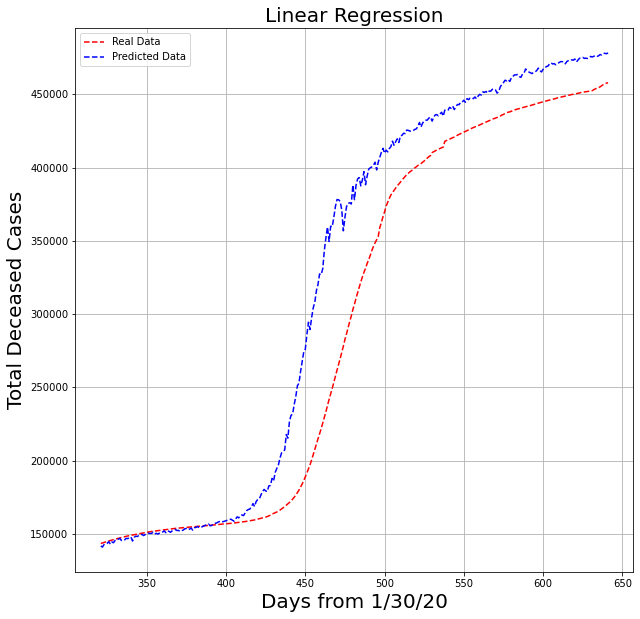

In [27]:
### Linear Regression Model ###

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Total Deceased Cases',size=20)
plt.title('Linear Regression',size=20)
plt.legend()
plt.grid()
plt.show()

R2 score: 0.891709492288259


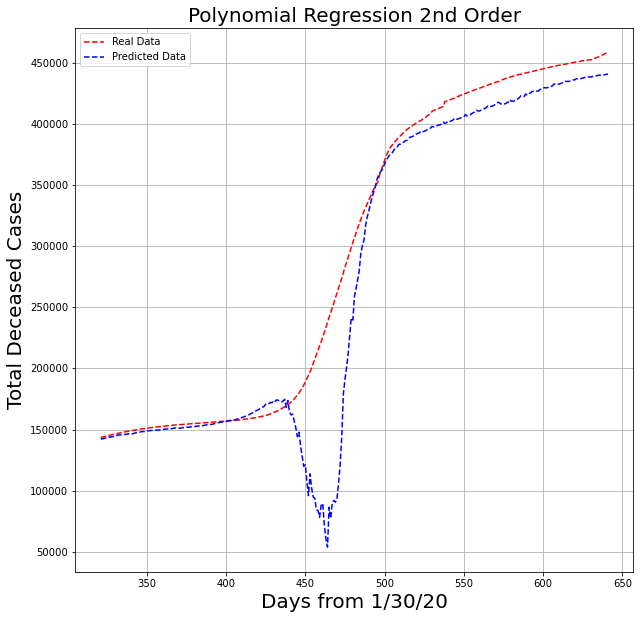

In [28]:
### Polynomial Regression Model 2nd Degree ###

poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly2, y_train)

y_pred = model.predict(X_test_poly2)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Total Deceased Cases',size=20)
plt.title('Polynomial Regression 2nd Order',size=20)
plt.legend()
plt.grid()
plt.show()

## Predicting Daily Deceased Cases

In [29]:
### Loading the dataset ###

data_whole = pd.read_csv('case_time_series.csv')
data_whole.isnull().sum() # Checking null values
print(data_whole)

data = data_whole.loc[:, data_whole.keys()[1]:data_whole.keys()[-1]]


days = []
for i in range(641):
    days.append(i+1)


tot_confirmed = data['Total Confirmed']
daily_confirmed = data['Daily Confirmed']
tot_recovered = data['Total Recovered']
daily_recovered = data['Daily Recovered']
tot_deceased = data['Total Deceased']
daily_deceased = data['Daily Deceased']

X = data.drop('Daily Deceased',axis=1).drop('Total Deceased',axis=1).drop('Date_YMD',axis=1)

                Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0    30 January 2020  2020-01-30                1                1   
1    31 January 2020  2020-01-31                0                1   
2    1 February 2020  2020-02-01                0                1   
3    2 February 2020  2020-02-02                1                2   
4    3 February 2020  2020-02-03                1                3   
..               ...         ...              ...              ...   
636  27 October 2021  2021-10-27            16351         34231030   
637  28 October 2021  2021-10-28            14307         34245337   
638  29 October 2021  2021-10-29            14215         34259552   
639  30 October 2021  2021-10-30            12940         34272492   
640  31 October 2021  2021-10-31            12907         34285399   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                  0                0               0               0  
1              

In [30]:
### dividing into training and testing data ###

days = np.array(days).reshape(-1,1)
daily_deceased = np.array(daily_deceased).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, daily_deceased, test_size=test_split, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

R2 score: 0.5198238915339906


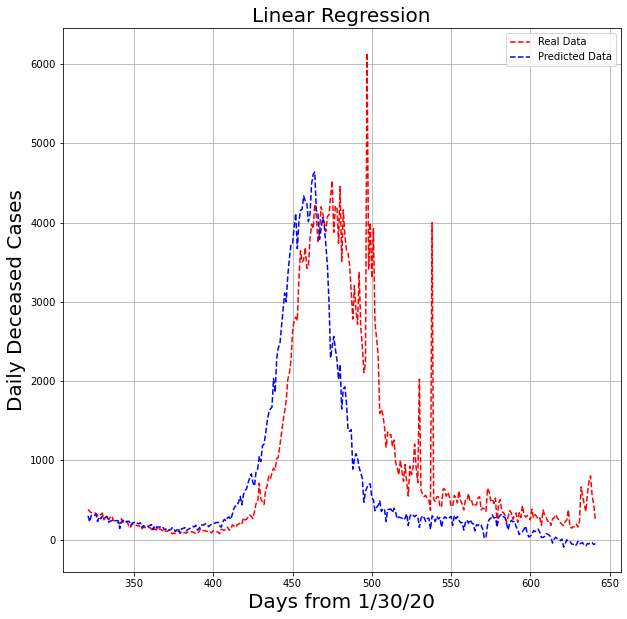

In [31]:
### Linear Regression Model ###

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Daily Deceased Cases',size=20)
plt.title('Linear Regression',size=20)
plt.legend()
plt.grid()
plt.show()

R2 score: -74.84441665029277


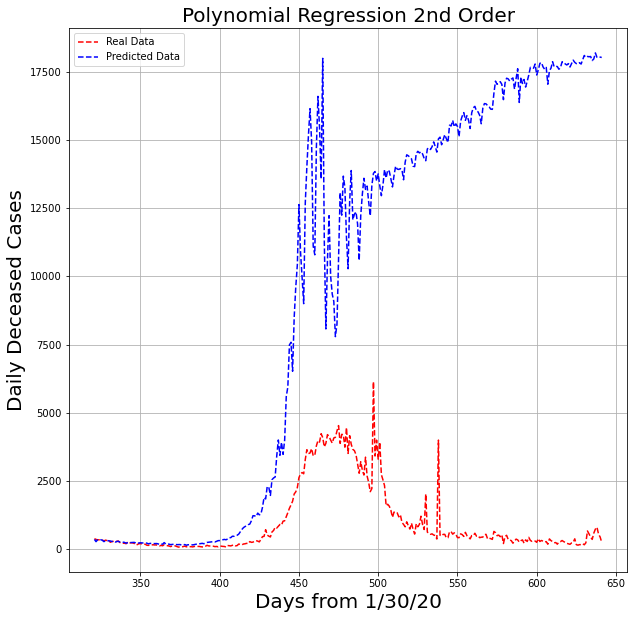

In [32]:
### Polynomial Regression Model 2nd Degree ###

poly2 = PolynomialFeatures(degree=2)

X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly2, y_train)

y_pred = model.predict(X_test_poly2)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

plt.figure(figsize=(10,10))
plt.plot(days[-math.ceil(641*test_split):],y_test,'--r',label = 'Real Data')
plt.plot(days[-math.ceil(641*test_split):],y_pred,'--b',label = 'Predicted Data')
plt.xlabel('Days from 1/30/20',size=20)
plt.ylabel('Daily Deceased Cases',size=20)
plt.title('Polynomial Regression 2nd Order',size=20)
plt.legend()
plt.grid()
plt.show()